## Backpropagation

Back-propagation is an algorithm that is used to set appropriate weights which enable the network to make more accurate predictions using gradient descent. The algorithm aims to provide the network with information on how to minimise the costs, and thus maximise the likelihood (probability) of the outputs of the model. This is done by propagating the cost function from each node/neuron on to the previous layer so that it can be later used as weights for the given nodes in the layer.

Since the likelihood is monotically increasing then the log likelihood can be taken such that:

$$ l = \sum_{n=1}^N{t_nlog(y_n) + (1- t_n)log(1-y_n)} $$

where t is the target(actual value), y is the predicted value and n is the current row of samples being observed.


To obtain the costs(error) of the model's likelihood predictions, the negative log likelihood is taken to create the <strong> Cross Entropy Loss </strong> such that:

<img src="../../images/cross_entropy.png" width="50%" height="50%">

We then update the weights through gradient descent which uses the derivative of the cross_entropy loss fucntion (in binary classification problems) in conjunction with a learning rate : 

 $$w = w - lr * \frac{dJ}{dw}$$

### Cross Entropy loss for Multiclass Classification

The likelihood of a multi-class problem is given by : 

<img src="../../images/multiclass_likelihood.png" width="30%" height="30%">

where  is the current row being observed and k is the number of classes. In this instance, the target array will be a One Hot encoded matrix for the classes k. 

The cross entropy for multiclass classification can be derived to be :


<img src="../../images/multiclass_cross_entropy.png" width="30%" height="30%">

### Gradient ascent 

Much like gradient descent this method pushes a function towards its global minimum. The main difference between gradient ascent and gradient descent is that the ascension method maximises the likelihood function (increases) whereas the descent algorithm minimises a cost function (decreasing). All in all, they are doing the same thing. 


Since neural networks are non-linear a local minimum is defined. In addition, the weight updates are dependent on the error at multiple outputs, then we will need the concept of <strong> Total Derivatives </strong>

Given the functions $$f(x,y), x(t), y(t)$$ 

$$\frac{d f}{d t} = \frac{\partial f}{\partial x}\frac{\partial x}{\partial t} + \frac{\partial f}{\partial y}\frac{\partial y}{\partial t}$$

With a vector x which has k components that are parametised by t : $$x_{k}(t)$$ then the total derivative can be obtained using : $$ \frac{df}{dt} = \sum_k{\frac{\partial f}{\partial x_{k}} \frac{\partial x_{k}}{\partial t}} $$

Let's assume that the input layers of dimensions D is combined with the weight matrix W for inputs to the activation function in the hidden layer M on the simple feedforward neural network above, and the hidden layer applies weight matrix V to be then used for the softmax function for the output layer K.

To perform backpropagation, the cost/object/w.e... from the output layer will to be passed back into the hidden layer and which will then be used to propagate updated weights into the input layer. 

$$\frac{\partial J}{\partial V_{mk}} = \sum_n\sum_{k'}{t_{k'}^n \frac{1}{y_{k'}^n} \frac{\partial y_{x'}^n}{\partial V_{mk}}}$$ 

where mk demonstrates the relationship between layers - in this case hidden layer and output layer - and k' is a summation variable (NB: k != k'). To obtain the derivative of the output layer, we need to take the derivative of the softmax function.  

#### Derivative of Softmax 

Softmax equation can be given by : $$ y_k = \frac{e^{a_k}}{\sum_{j}{e^{a_j}}}$$ where activation (a) of classes can be given by $$ a_k = V_k^\intercal Z = \sum_m{V_{mk}Z_m}$$ 

The higher level step of obtaining the derivative of the softmax produces two values. 
$$ \frac{\partial y_{k'}}{\partial a_k} = \begin{cases}y_{k'}(1-y_{k'}) & k=k'\\-y_{k'}y_k & k \neq k'\end{cases} $$

The two statements above can be combined using the <strong> Kronecker delta </strong>: 
    $$ \delta_{ij} =\begin{cases} 1 & i =j \\0 & i \neq j \end{cases} $$
so we can say the derivative of the sofmax is given by: 
    $$ \frac{\partial y_{k'}}{\partial a_k} = y_{k'}(\delta_{kk'} - y_{k'}) $$
    
The derivative of the activation function is: 
    $$ \frac{\partial a_k}{\partial V_{mk}} = Z_m $$
Combined, this gives : 
    $$ \frac{\partial J}{\partial V_{mk}} = \sum_n{(t_k^n - y_k^n)Z_m^n} $$
    
#### Derivative of input-hidden layer

To get the derivative of the weights obtained from the input layer D to the hidden layer M, We need to sum over all the samples and all the k classes since K is not derived between these two layers. This is the total derivative. This derivative is taken with respect to Z_m ( the product of the activation function from the hidden layer). 

$$ 
\frac{\partial J}{\partial Z_m}=\sum_k{(t_k^n -y_k^n)V_{mk} }
$$

If we are using the sigmoid function, then the final derivative returned will be 

$$ \frac{\partial Z_m}{\partial W_{dm}} =  Z_m^n(1-Z_m^n)X_d^n $$ 


where: $$ Z_m = \sigma(W_m^\intercal x) $$



Combined, this gives:

$$ 
    \frac{\partial J}{\partial W_{dm}} = \sum_n{\frac{\partial J}{\partial Z_m} \frac{\partial Z_m}{\partial W_{dm}}}
$$




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from sv_dl_intuition import forward, classification

importing Jupyter notebook from sv_dl_intuition.ipynb


<Figure size 640x480 with 1 Axes>

Classification rate for randomly chosen weights: 0.3333333333333333


In [2]:
def cost(T,Y):
    tot = T * np.log(Y)
    return tot.sum()

In [3]:
def dy_w2(hidden, Y, Yhat):
    N, K = Y.shape
    M = hidden.shape[1]
    
    '''
    # slow method
    ret1 = np.zeros((M,K))
    for n in range(N):
        for m in range(M):
            for k in range(K):
              ret1[m,k] += (Y[n,k] - Yhat[n,k]) * hidden[n,m] #m only appears twice
    '''
    '''
    ret2 = np.zeros((M,K))
    for n in range(N):
        for k in range(K):
            ret2[:,k] += (Y[n,k] - Yhat[n,k]) * hidden[n,:] # choose all m's at same time 
    '''
    '''
    ret3 = np.zeros((M,K))
    for n in range(N):
        ret3 += np.outer(hidden[n], Y[n] - Yhat[n])
    '''
    return hidden.T.dot(Y- Yhat)

def dy_b2(Y, Yhat):
    return (Y-Yhat).sum(axis=0)

def dy_w1(X, Z, Y, Yhat, W2):
    N, D = X.shape
    M, K = W2.shape
    '''
    # slow
    ret1 = np.zeros((D,M))
    for n in range(0,N):
        for k in range(0,K):
            for m in range(0,M):
                for d in range(0,D):
                    ret1[d,m] += (Y[n,k] - Yhat[n,k]) * W2[m,k] * Z[n,m] * (1-Z[n,m]) * X[n,d]
    return ret1
    '''
    dZ = (Y-Yhat).dot(W2.T) * Z * (1-Z)
    return X.T.dot(dZ)
    
def dy_b1(Y, Yhat, W2, Z):
    return ((Y-Yhat).dot(W2.T) * Z*(1-Z)).sum(axis=0)               

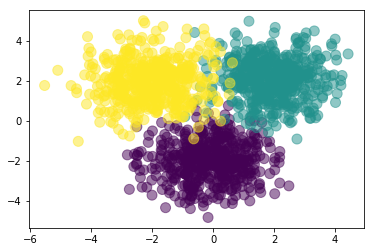

epoch: 0 cost: -1644.5489920035225 classification rate: 0.3566666666666667
epoch: 1 cost: -1375.2211084677365 classification rate: 0.5286666666666666
epoch: 2 cost: -1206.6119734741756 classification rate: 0.7266666666666667
epoch: 3 cost: -1075.2849133315476 classification rate: 0.8306666666666667
epoch: 4 cost: -964.7745310706521 classification rate: 0.8806666666666667
epoch: 5 cost: -869.7573879961037 classification rate: 0.9153333333333333
epoch: 6 cost: -788.5374252987342 classification rate: 0.9366666666666666
epoch: 7 cost: -719.785678569412 classification rate: 0.9473333333333334
epoch: 8 cost: -661.7369181011634 classification rate: 0.954
epoch: 9 cost: -612.5096545197905 classification rate: 0.96
epoch: 10 cost: -570.4373613512814 classification rate: 0.9606666666666667
epoch: 11 cost: -534.165401066882 classification rate: 0.962
epoch: 12 cost: -502.6247962626546 classification rate: 0.962
epoch: 13 cost: -474.9771815107917 classification rate: 0.9633333333333334
epoch: 14 c

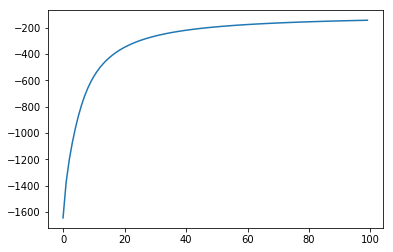

In [5]:
def main():
    NClass = 500 # creating samples per class

    # creating gaussian clouds centered between the np.array()
    X1 = np.random.randn(NClass, 2) + np.array([0,-2])
    X2 = np.random.randn(NClass, 2) + np.array([2, 2])
    X3 = np.random.randn(NClass, 2) + np.array([-2, 2])

    X = np.vstack([X1,X2,X3])
    Y = np.array([0]*NClass +[1]*NClass + [2]*NClass)
    N = len(Y)
    
    # defining dimensionalities for data
    D = 2
    M = 3 # hidden layer size
    K = 3 # number of classes
    
    # turn Y into an indicator variable since in Y they're represented as 0 -> K-1 
    # when they need to be onehot encoded so that they can be computed as probabilities
    T = np.zeros((N,K))
    
    # one hot encoding
    for i in range(N):
        T[i, Y[i]] = 1 # the value at i is used to as index for the T column. 
    
    
    # visualise data
    plt.scatter(X[:,0],X[:,1], c=Y, s=100, alpha=0.5)
    plt.show()
    
    # randomly initialise weights
    W1 = np.random.randn(D,M)
    b1 = np.random.randn(M)
    W2 = np.random.randn(M, K)
    b2 = np.random.randn(K)
    

    # hyper-params
    lr = 10e-7
    costs = []
    epochs = 100000
    for epoch in range(epochs):
        output, hidden = forward(X,W1,b1,W2,b2) # returns output and values from activation function
        if epoch % 1000 == 0:
            c = cost(T, output)
            P = np.argmax(output, axis=1)
            r = classification(Y,P)
            print('epoch:',int(epoch/1000),'cost:', c, 'classification rate:',r)
            costs.append(c)
            
        # Gradient ascent (simply opposite of the descent. Instead of - cost, it's plus cost and targets - predictions)
        W2 += lr * dy_w2(hidden, T, output)
        #print("Weights 2 update:",dy_w2(hidden,T,output))
        b2 += lr * dy_b2(T, output)
        W1 += lr * dy_w1(X, hidden, T, output, W2)
        #print("Weights 1 udpate:",dy_w1(X, hidden,T, output,W2))
        b1 += lr * dy_b1(T, output, W2, hidden)
        
    plt.plot(costs)
    plt.show()

if __name__ == '__main__':
    main()